This notebook replicates figures from Gao et al., 2018.

In [1]:
import datajoint as dj
from pipeline import ephys, behavior, subject
import numpy as np
import matplotlib.pyplot as plt
from pipeline import get_spk_counts, get_trials, get_spk_times, get_psth
import scipy.signal as signal
import scipy.stats as ss
import datetime
import numpy.random as random

Connecting root@db_gao2018:3306


## Figure 2c

In [2]:
subjects = subject.Subject & 'subject in ("anm00314746", "anm00314756", \
                             "anm00314757", "anm00314758", "anm00314760", "BAYLORCD6", "BAYLORNL12", "BAYLORNL14", \
    "BAYLORNL15")'

In [3]:
valid_psth = (ephys.AlignedPsth & subjects &
           (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') &
           'photo_stim_id = "0"' & 
           'trial_condition = "Hit"' &
           'l_trial_number > 15' &
           'r_trial_number > 15').proj(selectivity = 'sample_selectivity + delay_selectivity + response_selectivity')

In [46]:
fr_prefer, fr_non_prefer, bins = (ephys.AlignedPsth & (valid_psth & 'selectivity > 0')).fetch(
    'psth_prefer', 'psth_non_prefer', 'bins')

In [47]:
fr = np.array(fr_prefer.tolist()) - np.array(fr_non_prefer.tolist())

In [52]:
def compute_mean_and_sem(fr):
    mean_fr = np.average(fr, axis=0) * 5
    sem_fr = np.divide(np.std(fr, axis=0), np.sqrt(np.shape(fr)[0])) * 5
    return mean_fr, sem_fr

In [53]:
mean_fr, sem_fr = compute_mean_and_sem(fr)

In [54]:
xlim = [-3, 2]
ylim = [-1, 4]

Text(0, 0.5, 'Selectivity (spks/s)')

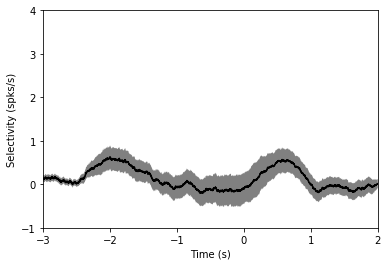

In [55]:
fig, ax = plt.subplots(1, 1, sharex=True)
ax.fill_between(bins[0], mean_fr+sem_fr, mean_fr-sem_fr, facecolor="gray")
ax.plot(bins[0], mean_fr, color="black")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Selectivity (spks/s)')